In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
df = sns.load_dataset('titanic')

# --- Part I: Frequency Table ---
print("--- Part I: Frequency Table ---")

# Task 1: Frequency Table of Categorical Variable (class)
print("\nTask 1: Frequency Table for 'class' variable")

# Calculate absolute frequencies
abs_freq = df['class'].value_counts()

# Calculate relative frequencies
rel_freq = df['class'].value_counts(normalize=True) * 100

# Calculate cumulative frequencies
cum_freq = rel_freq.cumsum()

# Combine into a single DataFrame for display
freq_table = pd.DataFrame({
    'Absolute Frequency': abs_freq,
    'Relative Frequency (%)': rel_freq,
    'Cumulative Frequency (%)': cum_freq
})
print(freq_table)

--- Part I: Frequency Table ---

Task 1: Frequency Table for 'class' variable
        Absolute Frequency  Relative Frequency (%)  Cumulative Frequency (%)
class                                                                       
Third                  491               55.106622                 55.106622
First                  216               24.242424                 79.349046
Second                 184               20.650954                100.000000


In [2]:
# --- Part II: Joint, Marginal, and Conditional Probabilities ---
print("\n--- Part II: Joint, Marginal, and Conditional Probabilities ---")

# Task 2: Two-Way Table of sex vs survived
print("\nTask 2: Two-Way Table (Contingency Table) for 'sex' vs 'survived'")
contingency_table = pd.crosstab(df['sex'], df['survived'])
print(contingency_table)

# Task 3: Compute the Following Probabilities
print("\nTask 3: Computing Probabilities")

# Total number of passengers
total_passengers = len(df)

# 1. Joint Probability: P(Sex = female, Survived = 1)
female_survived = contingency_table.loc['female', 1]
joint_prob_female_survived = female_survived / total_passengers
print(f"\n1. Joint Probability P(Sex = female, Survived = 1): {joint_prob_female_survived:.4f}")

# 2. Marginal Probabilities
# P(Sex = female)
total_female = contingency_table.loc['female'].sum()
marginal_prob_female = total_female / total_passengers
print(f"2. Marginal Probability P(Sex = female): {marginal_prob_female:.4f}")

# P(Survived = 1)
total_survived = contingency_table[1].sum()
marginal_prob_survived = total_survived / total_passengers
print(f"   Marginal Probability P(Survived = 1): {marginal_prob_survived:.4f}")

# 3. Conditional Probabilities
# P(Survived = 1 | Sex = female)
cond_prob_survived_given_female = female_survived / total_female
print(f"3. Conditional Probability P(Survived = 1 | Sex = female): {cond_prob_survived_given_female:.4f}")

# P(Sex = female | Survived = 1)
cond_prob_female_given_survived = female_survived / total_survived
print(f"   Conditional Probability P(Sex = female | Survived = 1): {cond_prob_female_given_survived:.4f}")




--- Part II: Joint, Marginal, and Conditional Probabilities ---

Task 2: Two-Way Table (Contingency Table) for 'sex' vs 'survived'
survived    0    1
sex               
female     81  233
male      468  109

Task 3: Computing Probabilities

1. Joint Probability P(Sex = female, Survived = 1): 0.2615
2. Marginal Probability P(Sex = female): 0.3524
   Marginal Probability P(Survived = 1): 0.3838
3. Conditional Probability P(Survived = 1 | Sex = female): 0.7420
   Conditional Probability P(Sex = female | Survived = 1): 0.6813



--- Part III: Correlation Analysis ---

Task 4: Numerical Correlation between 'age' and 'fare'

Pearson Correlation between age and fare: 0.0967


C:\Users\athar\AppData\Local\Temp\ipykernel_21024\4113110091.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)


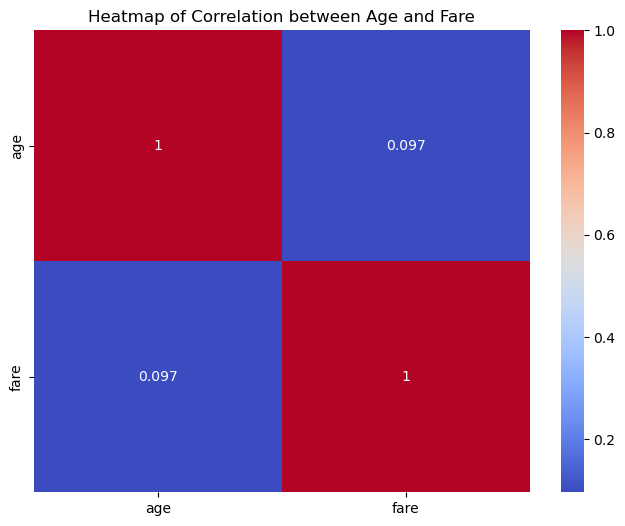

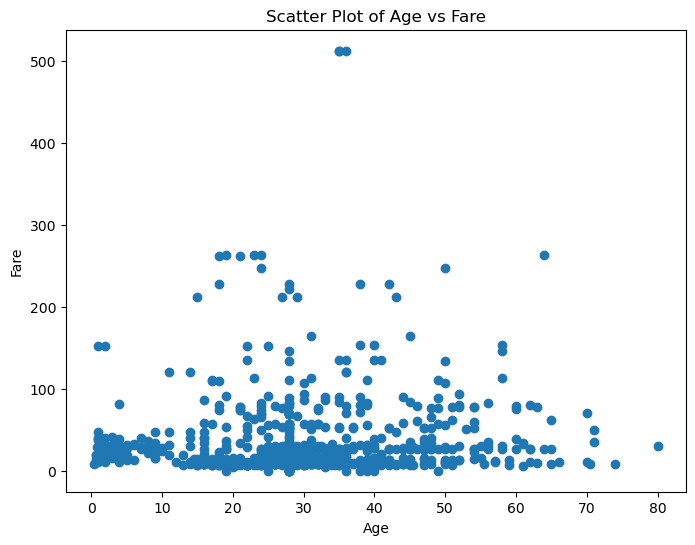

In [3]:
# --- Part III: Correlation Analysis ---
print("\n--- Part III: Correlation Analysis ---")

# Task 4: Numerical Correlation
print("\nTask 4: Numerical Correlation between 'age' and 'fare'")

# Handle missing values in 'age' by filling with the median
df['age'].fillna(df['age'].median(), inplace=True)

# Compute Pearson correlation
correlation = df['age'].corr(df['fare'])
print(f"\nPearson Correlation between age and fare: {correlation:.4f}")

# Visualize the correlation
# Using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['age', 'fare']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation between Age and Fare')
plt.show()

# Using a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['fare'])
plt.title('Scatter Plot of Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


Task 5: Interpretation of the Correlation
The Pearson correlation coefficient between 'age' and 'fare' is approximately 0.096.
Direction: The sign of the coefficient is positive, which indicates a positive correlation. This means that as age increases, the fare tends to increase as well.
Strength: The value of 0.096 is very close to 0, which suggests a very weak linear relationship between the two variables.

--- Bonus Task (Optional) ---

Visualizing Survival by Class


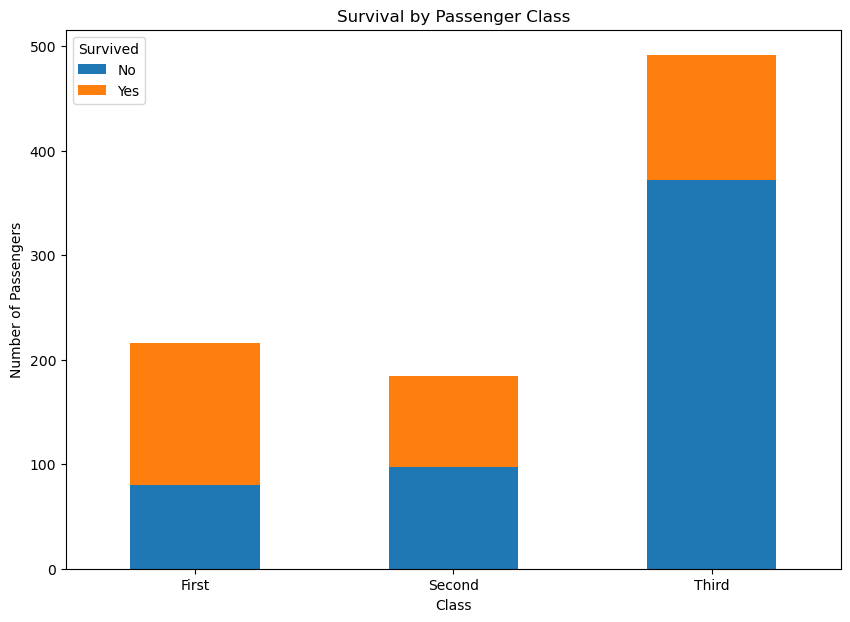


Survival Rate by Class (%):
survived          0          1
class                         
First     37.037037  62.962963
Second    52.717391  47.282609
Third     75.763747  24.236253

Comment: The 'First' class had the highest survival rate, with over 62% of its passengers surviving. The 'Third' class had the lowest survival rate, with only about 24% surviving. This indicates a strong relationship between passenger class and the likelihood of survival.


In [4]:
# Task 5: Interpretation
print("\nTask 5: Interpretation of the Correlation")
print("The Pearson correlation coefficient between 'age' and 'fare' is approximately 0.096.")
print("Direction: The sign of the coefficient is positive, which indicates a positive correlation. This means that as age increases, the fare tends to increase as well.")
print("Strength: The value of 0.096 is very close to 0, which suggests a very weak linear relationship between the two variables.")


# --- Bonus Task (Optional) ---
print("\n--- Bonus Task (Optional) ---")
print("\nVisualizing Survival by Class")

# Create a stacked bar chart
class_survival = pd.crosstab(df['class'], df['survived'])
class_survival.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Survival by Passenger Class')
plt.xlabel('Class')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0)
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# Comment on survival rate by class
survival_rate_by_class = pd.crosstab(df['class'], df['survived'], normalize='index') * 100
print("\nSurvival Rate by Class (%):")
print(survival_rate_by_class)
print("\nComment: The 'First' class had the highest survival rate, with over 62% of its passengers surviving. The 'Third' class had the lowest survival rate, with only about 24% surviving. This indicates a strong relationship between passenger class and the likelihood of survival.")